In [130]:
!pwd
%reload_ext autoreload
%autoreload 2

/Users/samiamer/Documents/School_Files/2022_Junior/Spring_2022/9.60/final_proj/rasta


In [ ]:
%cd rasta

In [304]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
print(tf.test.is_gpu_available())

def wp_preprocess_input(x):
    # 'RGB'->'BGR'
    x = x[:, :, ::-1]

    x[:,:,0] -=  133.104
    x[:,:,0] -=  119.973
    x[:,:,0] -=  104.432

    return x

2.8.0
False


In [287]:
tf.keras.backend.clear_session()

new_model = tf.keras.models.load_model('models/default/model.h5')
new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['categorical_accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5)])   
import json
# with open('models/best_top_1/model.json', 'r') as json_file:
#     new_model = tf.keras.models.model_from_json(json_file.read())
# new_model.summary()
# new_model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')


In [315]:
batch_size = 16
img_height = 224
img_width = 224
d_size = "small"
train_dir = f"data/wikipaintings_{d_size}/wikipaintings_train"
val_dir = f"data/wikipaintings_{d_size}/wikipaintings_val"
test_dir = f"data/wikipaintings_{d_size}/wikipaintings_test"

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size,
#   label_mode='categorical')

normalization_layer = tf.keras.layers.Rescaling(1./255)


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

val_ds = tf.keras.utils.image_dataset_from_directory(
val_dir,
image_size=(img_height, img_width),
batch_size=batch_size,
label_mode='categorical')

test_ds = tf.keras.utils.image_dataset_from_directory(
test_dir,
image_size=(img_height, img_width),
batch_size=batch_size,
label_mode='categorical')

class_names = train_ds.class_names


test_ds = test_ds.map(lambda image,label: (tf.keras.applications.imagenet_utils.preprocess_input(image),label))
train_ds = train_ds.map(lambda image,label: (tf.keras.applications.imagenet_utils.preprocess_input(image),label))
val_ds = val_ds.map(lambda image,label: (tf.keras.applications.imagenet_utils.preprocess_input(image),label))

# test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# print(class_names)

Found 250 files belonging to 25 classes.
Found 250 files belonging to 25 classes.
Found 250 files belonging to 25 classes.


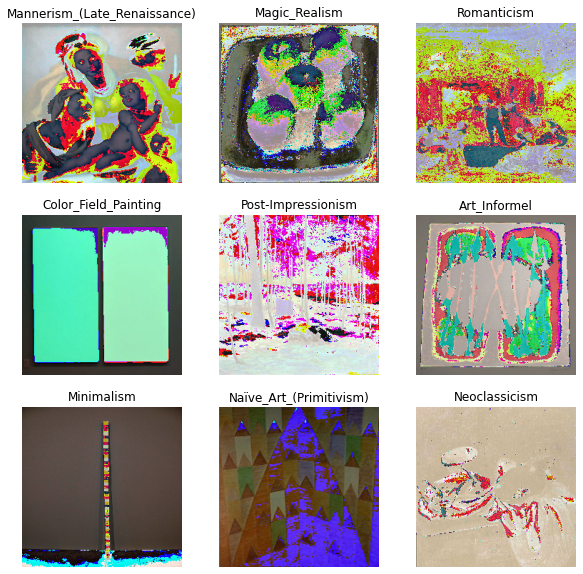

In [318]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.math.argmax(labels[i])])
    plt.axis("off")

In [233]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [319]:
# new_model.evaluate(test_ds, verbose=1)
# new_model.evaluate(test_ds)
new_model.evaluate(test_ds,verbose=1)
# list(test_ds.take(1).as_numpy_iterator())

# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

16/16 [==============================] - 45s 2s/step - loss: 2.6720 - categorical_accuracy: 0.4840 - top_k_categorical_accuracy: 0.8760


[2.6719701290130615, 0.48399999737739563, 0.8759999871253967]

In [ ]:
new_model.summary()
# new_model.layers[-1]

In [320]:
for layer in new_model.layers[1:-2]:
    layer.trainable = False
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_1[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                           

In [321]:
x = new_model.layers[-2].output 
x = tf.keras.layers.Dense(50,name="dense_end",activation='softmax')(x)
# # predictions = tf.keras.layers.Dense(25, activation = "softmax")(x)
model2 = tf.keras.Model(inputs = new_model.input, outputs = x)


# # model2 = tf.keras.Model(new_model.input, new_model.layers[-1].output)
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_1[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                             